# Conversions between binary mask and multipolygon 
## Simple example

This notebook illustrates via a simle example the conversions between a binary mask and a multipolygonal shape and the loading and saving to image and shape files using `satsense` python library.


### Generate a toy shape as multipolygon

In [1]:
# Python package imports
from shapely.geometry import MultiPolygon # for multipolygon data structure

# Create a multipolygon
a = [(2,6), (4,6), (4,9), (2,9), (2,6)]
b = [(6,9), (7,6), (9,4),(9,8), (7,9),(6,9)]
c = [(1,1), (5,1),(5,4),(3,4),(1,1)]
d = [(6,1), (10,1),(7,3),(6,1)]

multi = MultiPolygon([[a, []], [b, []] ,[c, []], [d, []]])

print('Multipolygon is valid?: ', multi.is_valid)

Multipolygon is valid?:  True


### Display the mulipolygon

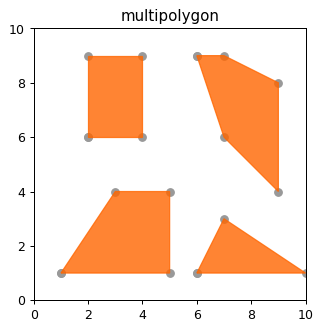

The area of the multi-polygon is 27.5


In [2]:
# Python package imports
from matplotlib import pyplot # for plots
from satsense.util.shapefile import show_multipolygon as shmp # visualization of multipolygons

# Visualization parameters
ORANGE = '#FF6600'
al = 0.8
show_verticies = True
extent = [0, 0, 10, 10] # format of extent is [xmin, ymin, xmax, ymax]

# Display the multipolygon
fig = pyplot.figure(1, dpi=90)
ax = fig.add_subplot(111)

shmp(multi, ax, show_verticies, extent, ORANGE, al, 'multipolygon')

pyplot.show()

# area
area = multi.area
print("The area of the multi-polygon is", area)

### Convert the multipolygon to a binary mask

[[  0   0   0   0   0   0   0   0   0   0]
 [  0 255 255 255 255   0 255 255 255   0]
 [  0   0 255 255 255   0   0 255   0   0]
 [  0   0   0 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255   0]
 [  0   0 255 255   0   0   0 255 255   0]
 [  0   0 255 255   0   0   0 255 255   0]
 [  0   0 255 255   0   0 255 255   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
(10, 10)


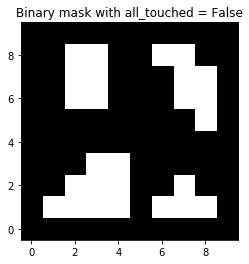

In [3]:
# Python package imports
from satsense.util.conversions import multipolygon2mask as mp2m # conversion from multipolygon to mask

# parameters
rows = 10
cols = 10
default_val = 255
all_touched = False
binary_mask1 = mp2m(multi, rows, cols, default_val, all_touched)

# print and display mask
print(binary_mask1)
print(binary_mask1.shape)
pyplot.imshow(binary_mask1, cmap='gray', origin='lower')
pyplot.title('Binary mask with all_touched = False')
pyplot.show()

[[  0   0   0   0   0   0   0   0   0   0]
 [  0 255 255 255 255 255 255 255 255 255]
 [  0 255 255 255 255 255 255 255 255   0]
 [  0   0 255 255 255 255   0 255   0   0]
 [  0   0   0 255 255 255   0   0 255 255]
 [  0   0   0   0   0   0   0 255 255 255]
 [  0   0 255 255 255   0 255 255 255 255]
 [  0   0 255 255 255   0 255 255 255 255]
 [  0   0 255 255 255   0 255 255 255 255]
 [  0   0 255 255 255   0 255 255   0   0]]
(10, 10)


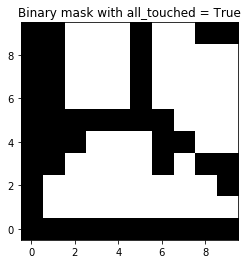

In [4]:
# parameters
all_touched = True
binary_mask2 = mp2m(multi, rows, cols, default_val, all_touched)

# print and display mask
print(binary_mask2)
print(binary_mask2.shape)
pyplot.imshow(binary_mask2, cmap='gray', origin='lower')
pyplot.title('Binary mask with all_touched = True')
pyplot.show()

### Saving binary mask to file

In [5]:
# Python and satsense imports
import os.path
from satsense.util.mask import save_mask2file

# raster filenames
path = '/home/elena/DynaSlum/Data/misc/'
ext = 'tif'
fname1 = 'simple_example_multipolygon_mask1' + '.' + ext
mask_fullfname1 = os.path.join(path, fname1)

fname2 = 'simple_example_multipolygon_mask2' + '.' + ext
mask_fullfname2 = os.path.join(path, fname2)

# save
save_mask2file(binary_mask1, mask_fullfname1)
print("Binary mask 1 is saved at ", mask_fullfname1)
save_mask2file(binary_mask2, mask_fullfname2)
print("Binary mask 2 is saved at ", mask_fullfname2)

Binary mask 1 is saved at  /home/elena/DynaSlum/Data/misc/simple_example_multipolygon_mask1.tif
Binary mask 2 is saved at  /home/elena/DynaSlum/Data/misc/simple_example_multipolygon_mask2.tif


/home/elena/anaconda3/envs/satelite/lib/python3.5/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


### Loading binary mask from file

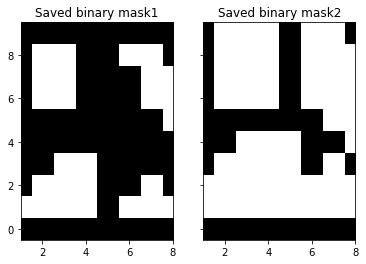

In [6]:
# satsense import
from satsense.util.mask import load_mask_from_file

saved_mask1 = load_mask_from_file(mask_fullfname1)

f, (ax1, ax2) = pyplot.subplots(1, 2, sharey=True)

ax1.imshow(saved_mask1, cmap='gray', origin = 'lower')
ax1.set_title('Saved binary mask1')

saved_mask2 = load_mask_from_file(mask_fullfname2)

ax2.imshow(saved_mask2, cmap='gray', origin = 'lower')
ax2.set_title('Saved binary mask2')
pyplot.show()

### Conversion of binary mask to multipolygon

Ring Self-intersection at or near point 8 4
Ring Self-intersection at or near point 8 4


Valid multi-polygon1 with connectivity 4? True
Valid multi-polygon1 with connectivity 8? True
Not a valid polygon!
Valid multi-polygon2 with connectivity 4? True
Valid multi-polygon2 with connectivity 8? False


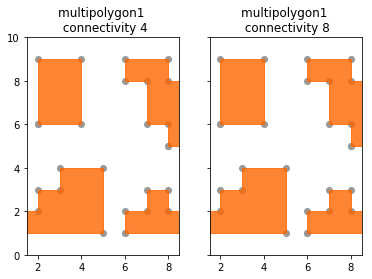

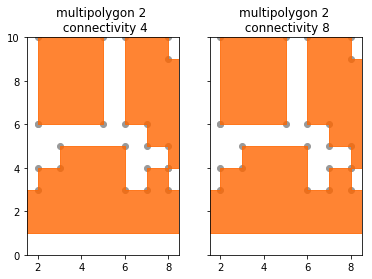

The area of the multi-polygon1 is 26.0
The area of the multi-polygon2 is 56.0
The difference of areas for multi-polygon1 with the original multipolygon is -1.5
The difference of areas for multi-polygon2 with the original multipolygon is 28.5


In [7]:
# satsense import
from satsense.util.conversions import mask2multipolygon as m2m

# parameters
t=(1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
conn8 = 8
conn4 = 4

# convert 
multi1_4 = m2m(saved_mask1, saved_mask1 ,t, conn4);
multi1_8 = m2m(saved_mask1, saved_mask1 ,t, conn8);

print("Valid multi-polygon1 with connectivity 4?", multi1_4.is_valid)
print("Valid multi-polygon1 with connectivity 8?", multi1_8.is_valid)

multi2_4 = m2m(saved_mask2, saved_mask2 ,t, conn4);
multi2_8 = m2m(saved_mask2, saved_mask2 ,t, conn8);

print("Valid multi-polygon2 with connectivity 4?", multi2_4.is_valid)
print("Valid multi-polygon2 with connectivity 8?", multi2_8.is_valid)

# display the multipolygons
_, (ax1, ax2) = pyplot.subplots(1, 2, sharey=True)

shmp(multi1_4, ax1, show_verticies, extent, ORANGE, al, 'multipolygon1 \n connectivity 4')
shmp(multi1_8, ax2, show_verticies, extent, ORANGE, al, 'multipolygon1 \n connectivity 8')

pyplot.show()

_, (ax1, ax2) = pyplot.subplots(1, 2, sharey=True)

shmp(multi2_4, ax1, show_verticies, extent, ORANGE, al, 'multipolygon 2 \n connectivity 4')
shmp(multi2_8, ax2, show_verticies, extent, ORANGE, al, 'multipolygon 2 \n connectivity 8')

pyplot.show()

# areas
print("The area of the multi-polygon1 is", multi1_4.area)
print("The area of the multi-polygon2 is", multi2_4.area)

print("The difference of areas for multi-polygon1 with the original multipolygon is", multi1_8.area - area)
print("The difference of areas for multi-polygon2 with the original multipolygon is", multi2_8.area - area)


### Saving multipolygons to a shapefile


In [8]:
# satsense import
from satsense.util.shapefile import save_multipolygon2shapefile as sm2sh # saving of multipolygon to shapefile

# parameters
# filename
ext = 'shp'
fname = 'simple_example_multipolygon' + '.' + ext

# full filename
shapefname = os.path.join(path, fname)
# saving
sm2sh(multi1_4, shapefname)

print("Please, check with a GIS weather this file contains a valid polygon! \n", shapefname)

Please, check with a GIS weather this file contains a valid polygon! 
 /home/elena/DynaSlum/Data/misc/simple_example_multipolygon.shp
